In [4]:

import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

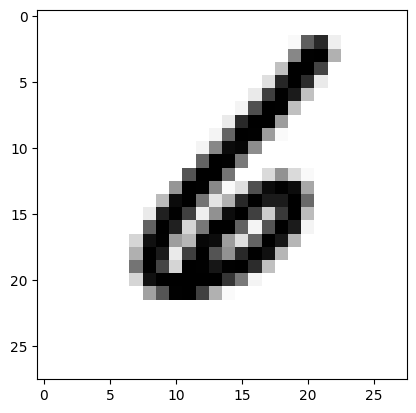

In [5]:
imagefile = 'F:\\DATA\\mnist\\train-images.idx3-ubyte'
imageArray = idx2numpy.convert_from_file(imagefile)
plt.imshow(imageArray[999], cmap=plt.cm.binary)

In [6]:
labelfile = 'F:\\DATA\\mnist\\train-labels.idx1-ubyte'
labelArray = idx2numpy.convert_from_file(labelfile)
labelArray[99]

1

In [7]:

# choose a random seed for reproducible results
np.random.seed(1)

# learning rate
alpha = .1

# number of nodes in the hidden layer
num_hidden = 3

# inputs
X = np.array( [[i % 2, i % 3] for i in range(100)] )

# outputs
# x.T is the transpose of x, making this a column vector
y = np.array([[i % 2 == i % 3] for i in range(100)]).T

# initialize weights randomly with mean 0 and range [-1, 1]
# the +1 in the 1st dimension of the weight matrices is for the bias weight
hidden_weights = 2*np.random.random((X.shape[1] + 1, num_hidden)) - 1
output_weights = 2*np.random.random((num_hidden + 1, y.shape[1])) - 1

# number of iterations of gradient descent
num_iterations = 10000
print(X, y)

[[0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [0 2]
 [1 0]] [[ True  True False False False False  True  True False False False False
   True  True False False False False  True  True False False False False
   True  True False False False False  True  True False False False False
   True  True False False False False  True  True False False False False
   

In [8]:
# define the sigmoid function
def sigmoid(x, derivative=False):

    if (derivative == True):
        return sigmoid(x,derivative=False) * (1 - sigmoid(x,derivative=False))
    else:
        return 1 / (1 + np.exp(-x))

In [9]:

# for each iteration of gradient descent
for i in range(num_iterations):

    # forward phase
    # np.hstack((np.ones(...), X) adds a fixed input of 1 for the bias weight
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    # backward phase
    # output layer error term
    output_error = output_layer_outputs - y
    # hidden layer error term
    # [:, 1:] removes the bias term from the backpropagation
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # partial derivatives
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # average for total gradients
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient


In [10]:

# print the final outputs of the neural network on the inputs X
print("Output After Training: \n{}".format(output_layer_outputs))

Output After Training: 
[[ 1.00000000e+00  1.00000000e+00  3.05311332e-16 ...  1.00000000e+00
  -2.63677968e-16 -4.16333634e-16]
 [ 1.00000000e+00  1.00000000e+00 -1.38777878e-16 ...  1.00000000e+00
   1.24900090e-16  1.38777878e-16]
 [ 1.00000000e+00  1.00000000e+00 -5.55111512e-17 ...  1.00000000e+00
   6.93889390e-17  5.55111512e-17]
 ...
 [ 1.00000000e+00  1.00000000e+00 -1.38777878e-16 ...  1.00000000e+00
   1.24900090e-16  1.38777878e-16]
 [ 1.00000000e+00  1.00000000e+00 -5.55111512e-17 ...  1.00000000e+00
   6.93889390e-17  5.55111512e-17]
 [ 1.00000000e+00  1.00000000e+00  1.11022302e-16 ...  1.00000000e+00
  -9.71445147e-17 -8.32667268e-17]]
